In [19]:
from sympy import *
from IPython.display import display, Math
import numpy as np
init_printing(use_unicode=True)
import plotly.express as px
import plotly.graph_objects as go

In [20]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.131
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [21]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [22]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
# Остаьные равновесия аналитически не найти. Полином 5 степени.

In [24]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [25]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [26]:
def display_sol_list(sol_list):
    for cur_mu, sols in sol_list:
        print(f"mu = {cur_mu}")
        display_solutions(sols)
        display("*"*20)

In [27]:
# for s in get_solutions():
#     display(s)

#### Бифуркационная диаграмма

In [28]:
mus = np.linspace(0.002, 0.022, 50)
# mus

In [29]:
from tqdm import tqdm

In [30]:
xs=[]
ys = []
mul = []
solutions_by_mu={}
for cur_mu in tqdm(mus):
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    # for s in solutions:
    #     if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
    #         ys.append(s[1].as_real_imag()[0])
    #         mul.append(cur_mu)
            
    

100%|███████████████████████████████████████████| 50/50 [01:49<00:00,  2.18s/it]


In [31]:
# for cur_mu, sols in list(solutions_by_mu.items()):
#     print(f"mu = {cur_mu}")
#     display_solutions(sols)
#     display("*"*20)

In [32]:
# sols_list = list(solutions_by_mu.items())
# display_sol_list(sols_list[:8])

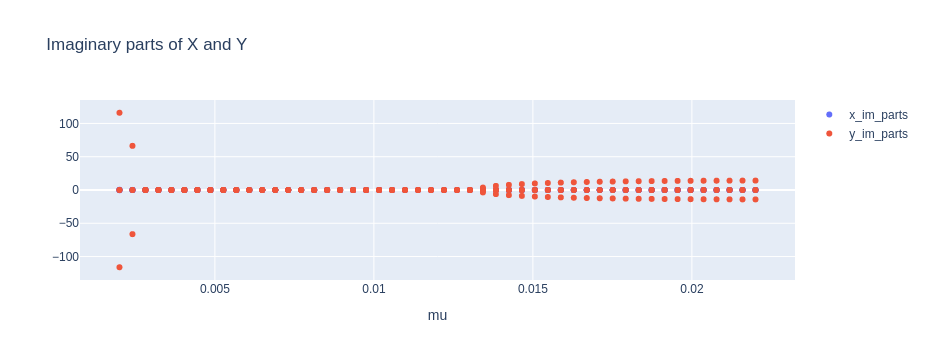

In [33]:
y_im_parts = []
x_im_parts = []
mus_for_im=[]
for cur_mu, sols in list(solutions_by_mu.items()):
    for x,y in sols:
        x_im_parts.append(float(x.as_real_imag()[1]))
        y_im_parts.append(float(y.as_real_imag()[1]))
        mus_for_im.append(cur_mu)
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_for_im, y=x_im_parts, mode='markers', name = "x_im_parts"))
fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Imaginary parts of X and Y")
fig.update_layout(xaxis={"title": "mu"})


На отрезке [0.005, 0.015] мнимая часть близка к нулю

In [39]:
mu_min = 0.002
mu_max = 0.017
filtered_solutions_by_mu = {mu:solutions_by_mu[mu] for mu in solutions_by_mu if mu_min<mu<mu_max}
filtered_solutions_by_mu

{0.0024081632653061226: [(0.315522308308843, 0.0), (1.60991802191104, 7.971264
69711529), (0.350003195146175 - 0.217130799868925⋅ⅈ, 393.030808329409 + 66.360
2689085957⋅ⅈ), (0.350003195146175 + 0.217130799868925⋅ⅈ, 393.030808329409 - 66
.3602689085957⋅ⅈ)], 0.0028163265306122448: [(0.315522308308843, 0.0), (0.23687
8621626327 + 0.e-28⋅ⅈ, 427.604333243788 - 0.e-21⋅ⅈ), (0.61254263688515 - 0.e-2
8⋅ⅈ, 312.792592639013 + 0.e-21⋅ⅈ), (1.60950855482186 - 0.e-29⋅ⅈ, 8.09640745053
325 + 0.e-21⋅ⅈ)], 0.0032244897959183673: [(0.315522308308843, 0.0), (0.1577991
2607756 - 0.e-21⋅ⅈ, 451.772883228129 - 0.e-20⋅ⅈ), (0.803331475094842 + 0.e-21⋅
ⅈ, 254.483045508911 + 0.e-20⋅ⅈ), (1.60908172692886 - 0.e-27⋅ⅈ, 8.2268560730856
9 + 0.e-19⋅ⅈ)], 0.0036326530612244895: [(0.315522308308843, 0.0), (0.121501517
440956 - 0.e-31⋅ⅈ, 462.866284400686 - 0.e-19⋅ⅈ), (0.926349839333441 - 0.e-21⋅ⅈ
, 216.885745924987 + 0.e-18⋅ⅈ), (1.60863617940538 + 0.e-22⋅ⅈ, 8.36302585410205
 - 0.e-20⋅ⅈ)], 0.0040408163265306125: [(0.3155223083

In [40]:
# display_sol_list(list(filtered_solutions_by_mu.items())[:2])

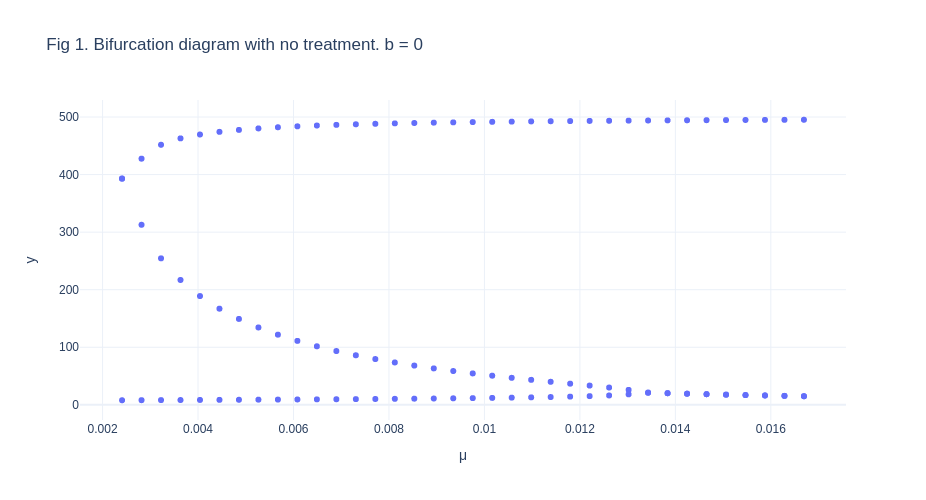

In [46]:

xs=[]
ys=[]
mus_bif = []
for cur_mu, sols in list(filtered_solutions_by_mu.items()):
    for x,y in sols:
        if y!=0:# (σ/δ, 0) - решение, не зависящее от mu
            mus_bif.append(cur_mu)
            xs.append(float(x.as_real_imag()[0]))
            ys.append(float(y.as_real_imag()[0]))
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_bif, y=ys, mode='markers', name = "x_im_parts"))
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Fig 1. Bifurcation diagram with no treatment. b = 0")
fig.update_layout(xaxis={"title": "μ"}, yaxis={"title": "y"}, template="plotly_white",autosize=False,
    width=600,
    height=500)